In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

In [2]:
train_dataset, validation_dataset, test_dataset = tfds.load(
    'mnist',
    split=["train[0%:80%]", "train[80%:100%]", "test"],
    shuffle_files=True,
    as_supervised=True
)

In [3]:
print(f"Number of training samples: {train_dataset.cardinality()}")
print(f"Number of validation samples: {validation_dataset.cardinality()}")
print(f"Number of test samples: {test_dataset.cardinality()}")

Number of training samples: 48000
Number of validation samples: 12000
Number of test samples: 10000


In [4]:
for example in train_dataset:
    print("Shape of a digit image:", example[0].shape)
    print("Shape of a label:", example[1].shape)
    break

Shape of a digit image: (28, 28, 1)
Shape of a label: ()


In [5]:
for example in train_dataset:
    for i in range(len(example[0])):
        l = tfds.as_numpy(tf.reshape(example[0][i], [-1]))
        for k in range(len(l)):
            if (k == 27):
                print(l[k], end='')
            elif (len(str(l[k+1])) == 1):
                print(l[k], end=' '*3)
            elif (len(str(l[k+1])) == 2):
                print(l[k], end=' '*2)
            elif (len(str(l[k+1])) == 3):
                print(l[k], end=' '*1)
        print()
    break

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254 101   0   0   0   0   0   0   0   0
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 174 253 119   0   0   0   0   0   0   0   0
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  31 247 202  29   0   0   0   0   0   0   0   0
0   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0 141 253 168   0   0   0   0   0   0   0   0   0
0   0   0 

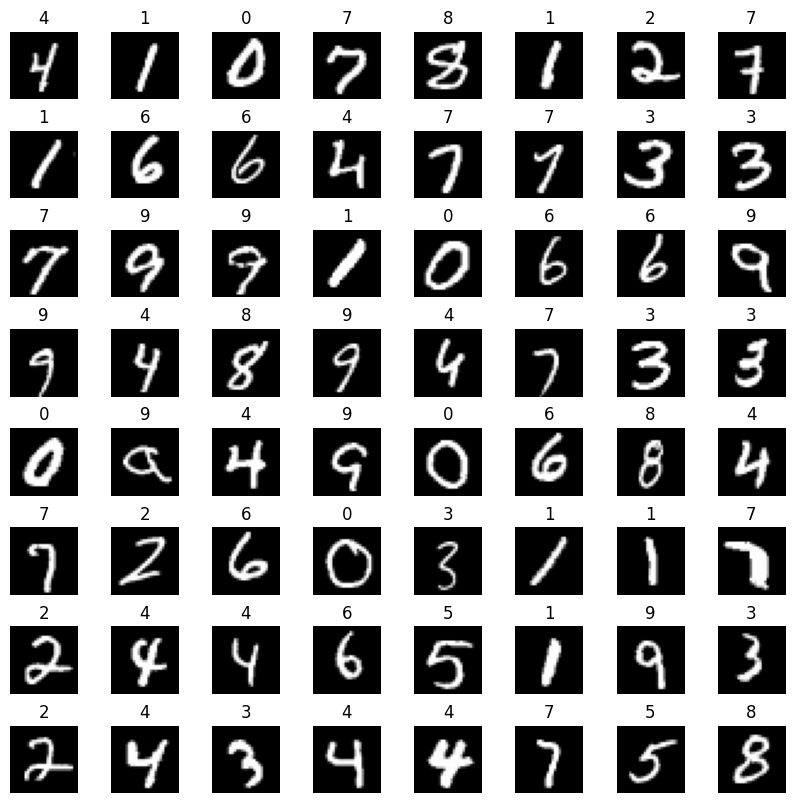

In [6]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_dataset.take(64)):
    ax = plt.subplot(8, 8, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(int(label))
    plt.axis('off')
plt.subplots_adjust(wspace=0.5, hspace=0.3)

In [7]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        tf.keras.layers.Flatten(Input(shape=(784,))),
        Dense(units = 25, activation='relu', name = 'L1'),
        Dense(units = 15, activation='relu', name = 'L2'),
        Dense(units = 10, activation='linear', name = 'L3')
    ], name = "my_model" 
)

In [8]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                19625     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 20175 (78.81 KB)
Trainable params: 20175 (78.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
[layer1, layer2, layer3] = model.layers
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [10]:
x = []
y = []
for example in train_dataset:
    flat_image = tf.reshape(example[0], shape=(784,))
    label = example[1]
    x.append(flat_image)
    y.append(label)

In [15]:
print(x.shape)

AttributeError: 'list' object has no attribute 'shape'

In [12]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    x,
    y,
    epochs=40,
    validation_data=validation_dataset
)

IndexError: tuple index out of range